In [2]:
%cd ..

/Users/mateoibarguen/Desktop/DATA-Capstone


In [226]:
from models.networks.lstm_models import *
from models.spectra_preprocessor import *
from models.run_train import *
import numpy as np
import pandas as pd
import seaborn as sns

In [100]:
dataset_name = "example_set"

In [175]:
spectra_pp = SpectraPreprocessor(dataset_name, num_channels=2, 
                                 num_instances=100, use_generator=False)

X_train, y_train, X_test, y_test = spectra_pp.transform()

### Issue with the data

In [194]:
num_instances = 2
num_channels = 3

In [137]:
dm_reshaped = np.array(dm[:num_instances])[:, :num_channels, :]

In [184]:
#np.array(dm_reshaped).shape

In [204]:
original_nc = 5
additional_nc =1

In [205]:
dm = np.array(spectra_pp.train_spectra_loader.get_dm()[:num_instances])[:, :original_nc, :]
dm_padded = pad(dm, additional_nc)
dm_reshaped = dm_padded.reshape(dm_padded.shape[0], dm_padded.shape[2], dm_padded.shape[1])

In [202]:
pad(dm, 1).shape

(2, 6, 301)

In [170]:
X_train[0][np.where(X_train[0] == 0.21664238148275244), :]

array([[[0.        , 0.21664238]],

       [[0.15643051, 0.12023792]]])

In [238]:
def pad(X, additional_nc, pad_mode):
    """
    constant default is 0.
    """
    
    return np.pad(X, ((0, 0), (0, additional_nc), (0, 0)), pad_mode)

In [239]:
def evaluate_model_padded(dataset_name, model, original_nc, target_nc, pad_mode, num_instances=100):
    
    spectra_pp = SpectraPreprocessor(dataset_name=dataset_name, num_channels=original_nc,
                                     num_instances=num_instances, use_generator=False)
    
    X_train, y_train = spectra_pp.transform_train()
    additional_nc = target_nc - original_nc
    dm = np.array(spectra_pp.train_spectra_loader.get_dm()[:num_instances])[:, :original_nc, :]
    dm_padded = pad(dm, additional_nc, pad_mode)
    dm_reshaped = dm_padded.reshape(dm_padded.shape[0], dm_padded.shape[2], dm_padded.shape[1])

    eval_results = model.evaluate(dm_reshaped, y_train)
    
    eval_metrics = eval_results['metrics_names']
    eval_scores = eval_results['metrics']
    eval_dict = {metric_name: score for metric_name, score in zip(eval_metrics, eval_scores)}
    eval_dict.update({'original_nc': original_nc, 'pad_mode': pad_mode})
    return eval_dict


In [244]:
evaluate_model_padded(dataset_name, model, original_nc=10, target_nc=50, pad_mode="constant")

100/100 [==============================] - 1s 6ms/sample - loss: 9.7268 - accuracy: 0.2900 - mae: 0.3583 - mse: 0.3156


{'loss': 9.726761741638184,
 'accuracy': 0.28999999165534973,
 'mae': 0.35834312438964844,
 'mse': 0.31556278467178345,
 'original_nc': 10,
 'pad_mode': 'constant'}

In [222]:
padded_nc_metrics = [evaluate_model_padded(dataset_name, model, original_nc=i, target_nc=50, ) for i in range(1, 3)]

100/100 [==============================] - 1s 6ms/sample - loss: 5.4661 - accuracy: 0.4400 - mae: 0.2752 - mse: 0.2484


In [248]:
def get_pad_metrics(dataset_name, model, lower_original_nc, upper_original_nc, target_nc, pad_mode, num_instances=200):
    padded_nc_metrics = [evaluate_model_padded(dataset_name, model, original_nc=i, target_nc=target_nc, pad_mode=pad_mode) 
                         for i in range(lower_original_nc, upper_original_nc)]
    return pd.DataFrame(padded_nc_metrics)

In [251]:
pad_metrics_df = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="symmetric")

100/100 [==============================] - 1s 8ms/sample - loss: 0.1936 - accuracy: 0.9200 - mae: 0.0437 - mse: 0.0267


In [255]:
pad_metrics_df_reflective = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="reflect")

100/100 [==============================] - 1s 7ms/sample - loss: 0.2274 - accuracy: 0.9300 - mae: 0.0444 - mse: 0.0290


In [260]:
pad_metrics_df_constant = get_pad_metrics(dataset_name, model, 
                                 lower_original_nc=1, upper_original_nc=50, 
                                 target_nc=50, pad_mode="constant")

100/100 [==============================] - 1s 8ms/sample - loss: 0.1938 - accuracy: 0.9300 - mae: 0.0417 - mse: 0.0271


In [256]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [261]:
pad_df = pd.concat([pad_metrics_df_reflective, pad_metrics_df, pad_metrics_df_constant])
pad_df

,accuracy,loss,mae,mse,original_nc,pad_mode
0,0.20,20.603199,0.399996,0.398211,1,reflect
1,0.44,5.466110,0.275193,0.248444,2,reflect
2,0.55,3.671391,0.235913,0.210530,3,reflect
3,0.58,3.325098,0.208088,0.188749,4,reflect
4,0.67,2.298185,0.166143,0.145613,5,reflect
5,0.67,1.738949,0.159831,0.137866,6,reflect
6,0.70,1.733287,0.159244,0.136049,7,reflect
7,0.69,1.497659,0.149125,0.124969,8,reflect
8,0.70,1.655199,0.147072,0.130880,9,reflect
9,0.71,1.270788,0.140488,0.121237,10,reflect


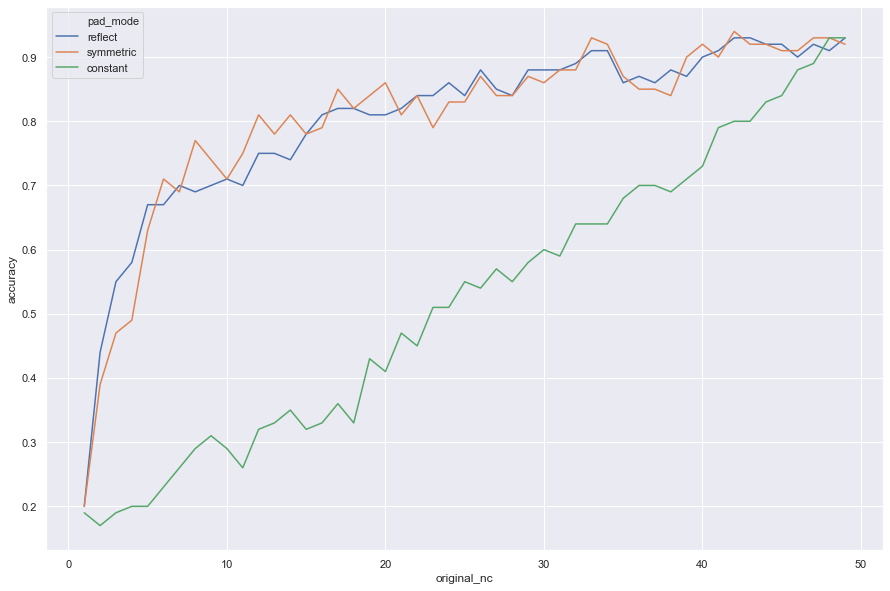

In [269]:
plt.figure(figsize=(15, 10))

ax = sns.lineplot(x='original_nc', y='accuracy', data=pad_df, hue='pad_mode')
plt.show()

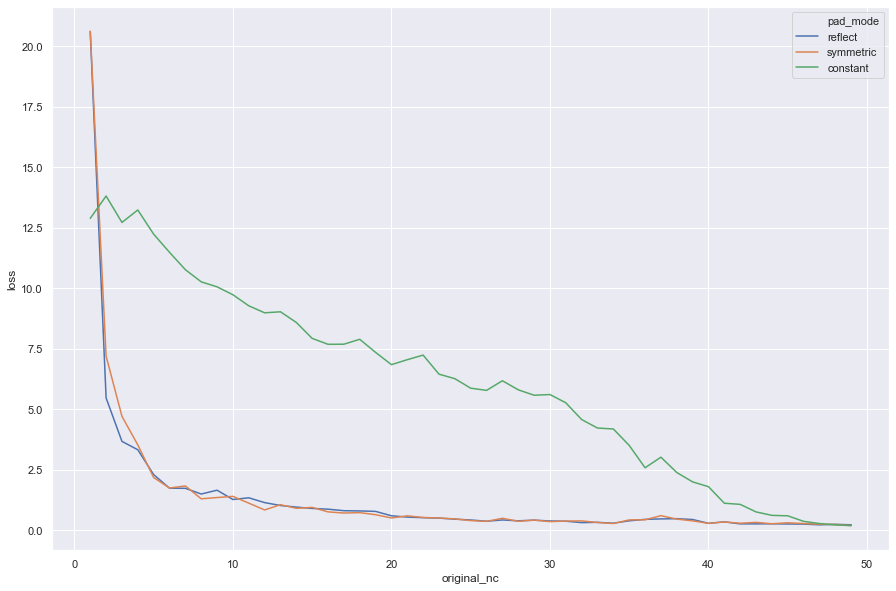

In [270]:
plt.figure(figsize=(15, 10))

ax = sns.lineplot(x='original_nc', y='loss', data=pad_df, hue='pad_mode')
plt.show()

In [43]:
dataset_name = "set_nc50_ns20k_v2"
dataset_config, model = initialize_model(dataset_name=dataset_name, model_name="GoogleModel", model_module_index=3, num_channels=50, num_instances=100)

model_module_index:  3
loaded_modules:  [(<module 'models.networks.abstract_models' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/abstract_models/__init__.py'>, 'models.networks.abstract_models'), (<module 'models.networks.ensemble_models' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/ensemble_models.py'>, 'models.networks.ensemble_models'), (<module 'models.networks.evaluator' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/evaluator.py'>, 'models.networks.evaluator'), (<module 'models.networks.lstm_models' from '/Users/mateoibarguen/Desktop/DATA-Capstone/models/networks/lstm_models.py'>, 'models.networks.lstm_models')]


In [16]:
class GoogleModel(BaseModel):

    def set_params_range(self):
        return {'conv_1': {'type': 'integer', 'min': 8, 'max': 64, 'default': 16},
                'conv_2': {'type': 'integer', 'min': 8, 'max': 64, 'default': 32},
                'bi_1': {'type': 'float', 'min': 8, 'max': 128, 'default': 128},
                'bi_2': {'type': 'integer', 'min': 8, 'max': 128, 'default': 128},
                'drop_1': {'type': 'float', 'min': 0, 'max': 1, 'default': 0.01},
                'dense_1': {'type': 'float', 'min': 8, 'max': 128, 'default': 64},
                'drop_2': {'type': 'float', 'min': 0, 'max': 1, 'default': 0.05}
                }

    def build_model(self, num_channels, num_timesteps, output_shape, params):
        """
        From: https://github.com/douglas125/SpeechCmdRecognition/blob/master/SpeechModels.py

        """
        model = Sequential()
        model.add(Conv1D(params['conv_1'], 5, input_shape=(num_timesteps, num_channels)))
        model.add(BatchNormalization())
        model.add(Conv1D(params['conv_2'], 5))
        model.add(BatchNormalization())
        model.add(Bidirectional(LSTM(params['bi_1'], return_sequences=True)))
        model.add(Bidirectional(LSTM(params['bi_2'], return_sequences=True)))
        model.add(Attention(293))
        model.add(Dropout(params['drop_1']))
        model.add(Dense(params['dense_1'], activation='elu'))
        model.add(Dropout(params['drop_2']))
        model.add(Dense(output_shape, activation='softmax'))
        return model

In [47]:
model.persist("GoogleModel_BC-1234-50c-all.0513.2202")

Using default parameters: {'conv_1': 16, 'conv_2': 32, 'bi_1': 128, 'bi_2': 128, 'drop_1': 0.01, 'dense_1': 64, 'drop_2': 0.05}


In [23]:
spectra_pp = SpectraPreprocessor(dataset_name=dataset_name, num_channels=dataset_config['num_channels'], 
                                 num_instances=100, use_generator=False)

X_train, y_train, X_test, y_test = spectra_pp.transform()
COMPILE_DICT = {'optimizer': 'adam','loss': 'categorical_crossentropy', 'metrics': ['accuracy', 'mae', 'mse']}

In [24]:
model.fit(X_train, y_train, X_test, y_test, 64, 1, compile_dict=COMPILE_DICT)

Using default parameters: {'conv_1': 16, 'conv_2': 32, 'bi_1': 128, 'bi_2': 128, 'drop_1': 0.01, 'dense_1': 64, 'drop_2': 0.05}
Train on 68 samples, validate on 17 samples
15/15 [==============================] - 0s 7ms/sample - loss: 1.6966 - accuracy: 0.1333 - mae: 0.3221 - mse: 0.1699


In [12]:
a = np.array([[0, 1, 2], [3, 4, 5]])
np.pad(a, ((1, 0), (0, 0)), 'symmetric')

array([[0, 1, 2],
       [0, 1, 2],
       [3, 4, 5]])